In [168]:
import numpy as np
import xarray as xr
import seaborn, functools
import scipy
import matplotlib.pyplot as plt

In [169]:
ds = xr.load_dataset("/home/deepak/Project/trial_short_project/jax-plasma/examples/solvers/compressible/02_poiseuille_flow/my_dataset.nc")

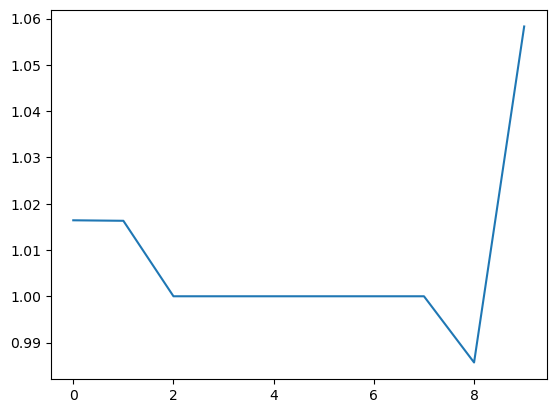

In [170]:
plt.plot(ds['p'][-1,:,5]/1e5)
# plt.plot(ds['u'][50,:,5])
# plt.plot(ds['u'][0,5,:])
# plt.plot(ds['p'][:,5,5])

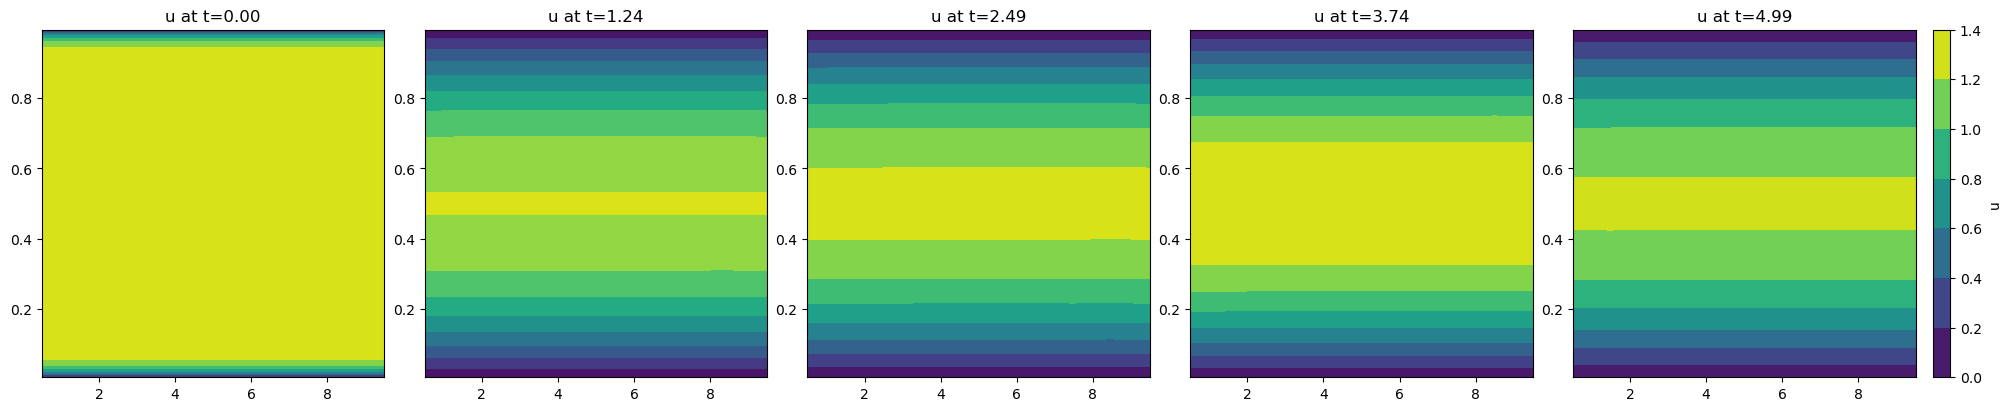

In [171]:
import matplotlib.pyplot as plt
import numpy as np

var = 'u'
# Choose n evenly spaced time indices
n = 5  # or any number you want
time_indices = np.linspace(0, 
                           len(ds['time']) - 1
                           , n, dtype=int)

plt.close()
# Create subplots
fig, ax = plt.subplots(1, n, figsize=(4*n, 4*1), constrained_layout=True)

# vmin = ds[var].min().item()
# vmax = ds[var].max().item()
for i, t_idx in enumerate(time_indices):
    im1 = ax[i].contourf(*np.meshgrid(ds['x'], ds['y'], indexing='ij'), ds[var][t_idx], 
                #    levels=np.linspace(vmin, vmax, 20), 
                   cmap='viridis')
    ax[i].set_title(f"{var} at t={ds['time'].values[t_idx]:.2f}")

# Add shared colorbar
fig.colorbar(im1, ax=ax[i], orientation='vertical', label=var)

plt.show()


Text(0.5, 1.0, 'Velocity Profile: Conservative Variable Formulation')

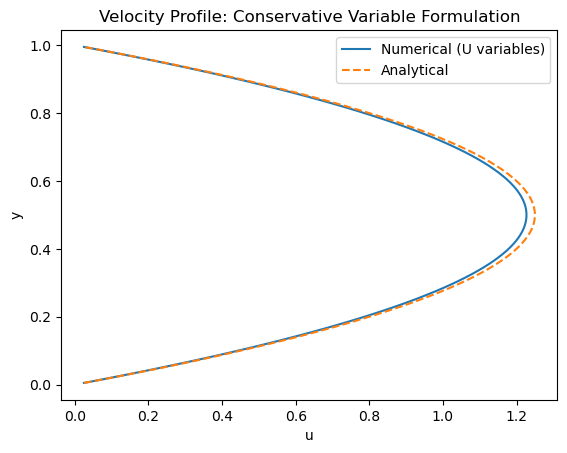

In [172]:
dpdx = 1.
mu = 1e-1
y = ds['y']
u_prof = ds['u'][-1,5,:]
# Analytical solution
analytical = (dpdx / (2 * mu)) * y * (1.0 - y)

plt.figure()
plt.plot(u_prof, y, label='Numerical (U variables)')
plt.plot(analytical, y, '--', label='Analytical')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.title('Velocity Profile: Conservative Variable Formulation')